In [9]:
%matplotlib inline

from collections import Counter

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [10]:
df_path = '../experiments/DLDLM_static_evaluation/dldlm_medium_hlvl_2022_05_04_12_56_13/evaluation_results.csv'
df = pd.read_csv(df_path)

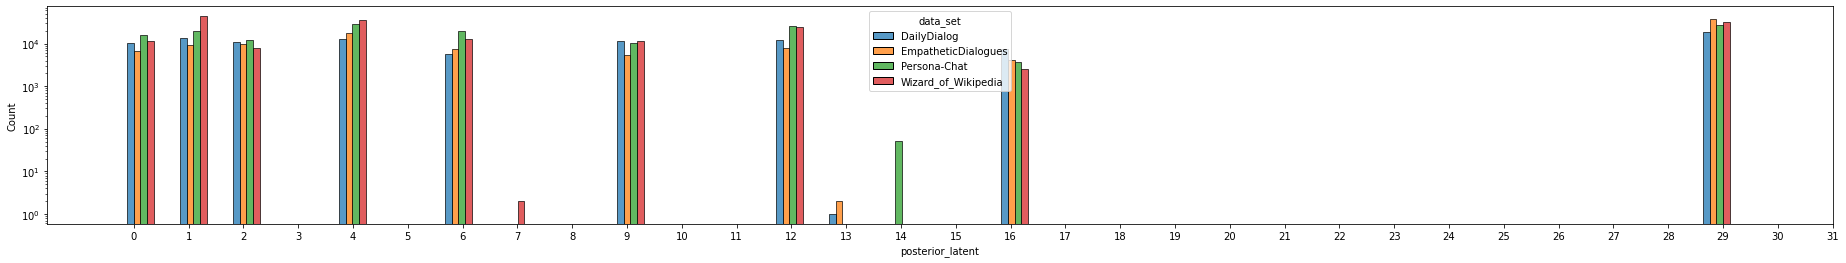

In [11]:
plt.figure(figsize=(32, 4))
sns.histplot(data=df, x='posterior_latent', hue='data_set', shrink=2., multiple='dodge', common_norm=False)
plt.yscale('log')
plt.xticks(range(32))
plt.show()

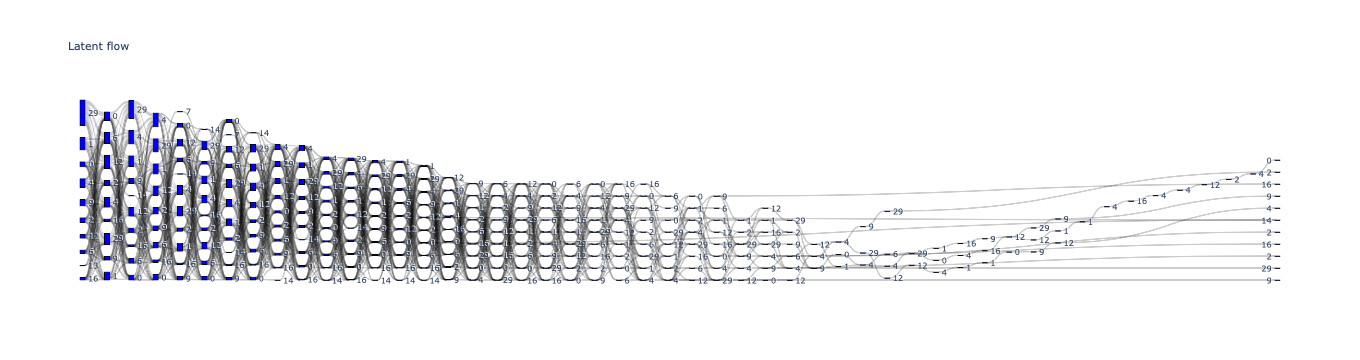

In [12]:
z_ids = list(df['posterior_latent'].unique())
max_len = max(len(g) for _, g in df.groupby('conversation_id'))

data = dict()
for _, dialog in df.groupby('conversation_id'):
    trace = dialog['posterior_latent'].to_list()
    for t in range(len(trace) - 1):
        data[(f't_{t}_z_{trace[t]}', f't_{t + 1}_z_{trace[t + 1]}')] = \
            data.get((f't_{t}_z_{trace[t]}', f't_{t + 1}_z_{trace[t + 1]}'), 0) + 1

labels_dict = {lbl: i for i, lbl in enumerate(set(l for k in data for l in k))}

sankey_data = {'source': [], 'target': [], 'value': []}
for (s, t), v in data.items():
    sankey_data['source'].append(labels_dict[s])
    sankey_data['target'].append(labels_dict[t])
    sankey_data['value'].append(v)

sankey_labels = [lbl.split('_')[-1] for lbl in labels_dict]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 5,
      line = dict(color = "black", width = 0.5),
      label = sankey_labels,
      color = "blue"
    ),
    link = sankey_data)])

fig.update_layout(title_text="Latent flow", font_size=8)
fig.show()

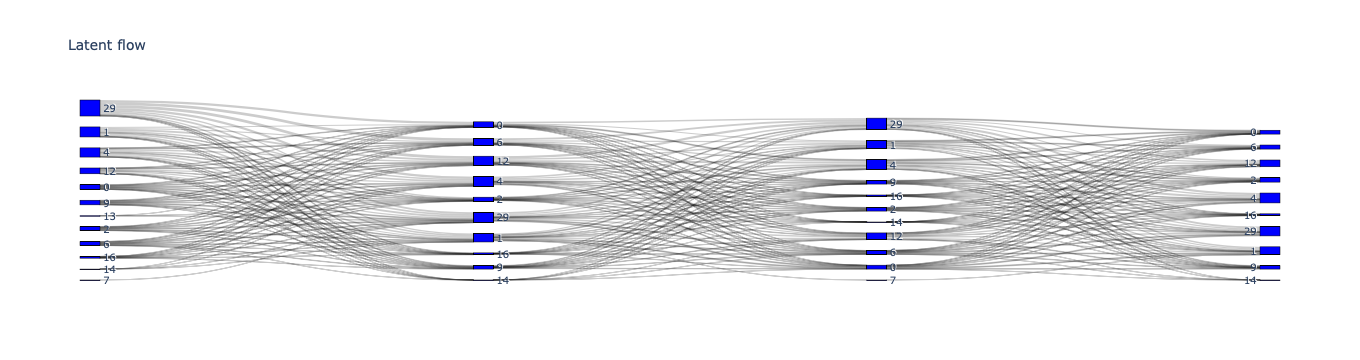

In [6]:
win_size = 4

z_ids = list(df['posterior_latent'].unique())
max_len = max(len(g) for _, g in df.groupby('conversation_id'))

data = dict()
for _, dialog in df.groupby('conversation_id'):
    trace = dialog['posterior_latent'].to_list()
    for t in range(len(trace) - 1):
        if (t + 1)  % win_size != 0:
            data[(f't_{t % win_size}_z_{trace[t]}', f't_{(t + 1)  % win_size}_z_{trace[t + 1]}')] = \
                data.get((f't_{t % win_size}_z_{trace[t]}', f't_{(t + 1)  % win_size}_z_{trace[t + 1]}'), 0) + 1

labels_dict = {lbl: i for i, lbl in enumerate(set(l for k in data for l in k))}

sankey_data = {'source': [], 'target': [], 'value': []}
for (s, t), v in data.items():
    sankey_data['source'].append(labels_dict[s])
    sankey_data['target'].append(labels_dict[t])
    sankey_data['value'].append(v)

sankey_labels = [lbl.split('_')[-1] for lbl in labels_dict]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = sankey_labels,
      color = "blue"
    ),
    link = sankey_data)])

fig.update_layout(title_text="Latent flow", font_size=10)
fig.show()

In [13]:
def pre_process_string(string):

    regex_articles = re.compile(r'\b(a|an|the)\b')
    regex_punctuation = re.compile(r'[!"#$%&()*+,\-./:;<=>?@\[\]\\^`{|}~_\']')

    string = regex_articles.sub(' ', string)
    string = regex_punctuation.sub(' ', string)
    string = " ".join(string.split())

    preprocessed_string = [word.lower() for word in word_tokenize(string) if word.lower() not in stop_words]

    return preprocessed_string



top_n = 30

stop_words = set(stopwords.words('english'))
data = {
    str(group['posterior_latent'].values[0]):
        Counter([w for _, row in group.iterrows() for w in pre_process_string(row['turn'])])
    for _, group in df.groupby('posterior_latent')
}

data = {
    k: sorted(v, key=lambda x: -v[x])[:top_n] for k, v in data.items()
}
data = {
    k: v if len(v) == top_n else v + ([None] * (top_n - len(v))) for k, v in data.items()
}

count_df = pd.DataFrame(data)
count_df.head(n=20)

,0,1,2,4,6,7,9,12,13,14,16,29
0,like,like,like,like,like,trained,like,like,lovely,love,good,like
1,today,love,oh,love,oh,position,yes,know,day,like,sounds,one
2,hi,yes,good,know,really,probably,love,oh,today,yes,yes,get
3,hello,one,really,good,good,didnt,good,would,else,go,thank,time
4,kind,also,know,really,cool,take,really,love,need,movie,like,well
5,good,good,would,would,know,long,great,really,sunny,also,oh,yes
6,know,well,sounds,think,wow,explode,well,think,bench,play,thanks,really
7,favorite,favorite,well,well,sounds,existence,also,good,chips,going,great,work
8,get,really,yes,yes,interesting,None,would,one,hope,think,wow,good
9,long,time,great,oh,nice,None,yeah,well,applying,everything,help,go
